### Data analysis in astronomy at NTU 

Week 5

Ting-Wen Lan 

This notebook is for exploring the correlation coefficients

In [1]:
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt
import my_plot_style as mps
import healpy as hp
import matplotlib.cm as cm
import importlib
import scipy.stats as ss
importlib.reload(mps)

<module 'my_plot_style' from '/Users/blue/Dropbox/Astro_Research/code/my_plot_style.py'>

### https://www.dropbox.com/s/h7545q0vzcqhi38/sky_maps_new_64_v6.fits?dl=0

In [2]:
ISM = pf.getdata('./data/sky_maps_new_64_v6.fits',1)

In [3]:
EBV = ISM['SFD']
HI = ISM['HI']/1e21

conversion_factor = 2*1e20/1e21
H2 = ISM['CO10']*conversion_factor


<ipython-input-4-0f40923188a6>:3: RuntimeWarning: invalid value encountered in log10
  hp.mollview(np.log10(H2*1e21),min=19,max=22,title='H2',cmap=cm.jet,unit='$log_{10} N_{H2}$')


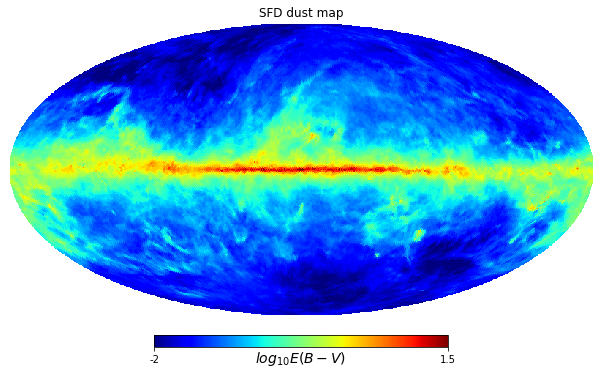

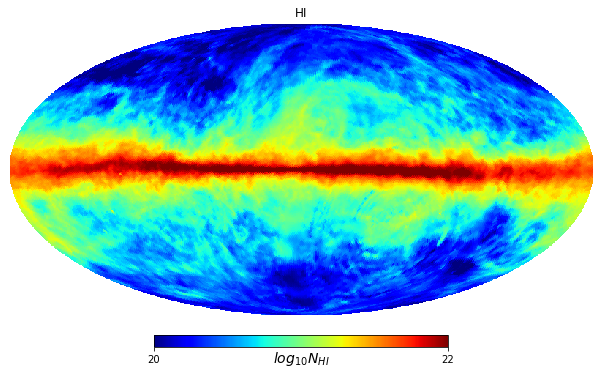

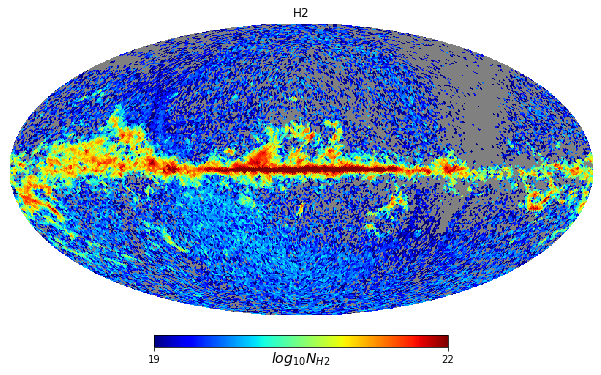

In [4]:
hp.mollview(np.log10(EBV),min=-2,max=1.5,title='SFD dust map',cmap=cm.jet,unit='$log_{10} E(B-V)$')
hp.mollview(np.log10(HI*1e21),min=20,max=22,title='HI',cmap=cm.jet,unit='$log_{10} N_{HI}$')
hp.mollview(np.log10(H2*1e21),min=19,max=22,title='H2',cmap=cm.jet,unit='$log_{10} N_{H2}$')

Text(0, 0.5, '$N_{H2}$ [$10^{21} \\rm cm^{-2}$]')

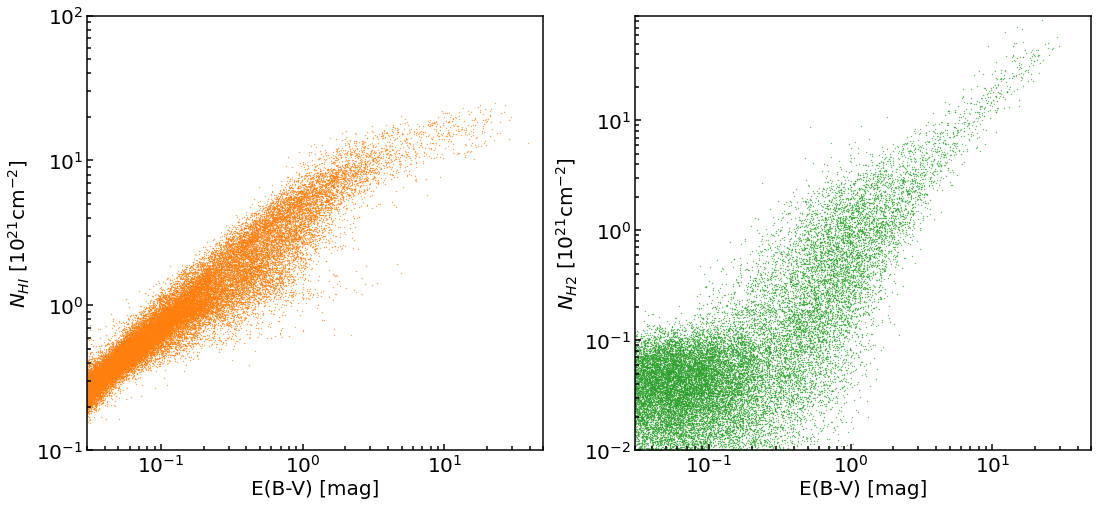

In [26]:
plt.figure(figsize=(18,8))
mps.my_plot_style()
plt.subplots_adjust(hspace=0)
plt.subplot(1,2,1)

plt.scatter(EBV,HI,s=0.1,c='C1')
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.03,50)
plt.xlabel('E(B-V) [mag]',fontsize=20)
plt.ylim(0.1,100)
plt.ylabel('$N_{HI}$ [$10^{21} \\rm cm^{-2}$]',fontsize=20)

mps.my_plot_style()



plt.subplot(1,2,2)
plt.scatter(EBV,H2,s=0.1,c='C2')
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.03,50)
plt.ylim(0.01,90)
plt.xlabel('E(B-V) [mag]',fontsize=20)
plt.ylabel('$N_{H2}$ [$10^{21} \\rm cm^{-2}$]',fontsize=20)

# Exercise 1 Pearson correlation coefficient

### https://www.dropbox.com/s/h7545q0vzcqhi38/sky_maps_new_64_v6.fits?dl=0
### 1. Write your own code to calculate Pearson correlation coefficient between (EBV, HI) (EBV, H2)
### 2. Using boostrap to estimate the uncertainty
### 3. Compare the coefficient from your code and from scipy.stats.pearsonr

In [6]:
ISM = pf.getdata('./data/sky_maps_new_64_v6.fits',1)

In [7]:
EBV = ISM['SFD']
HI = ISM['HI']/1e21

conversion_factor = 2*1e20/1e21 ### A factor to convert CO to H2
H2 = ISM['CO10']*conversion_factor

In [4]:
def your_pearsonr(x,y):
    return pearson_correlation_coefficient

# Exercise 2 Spearman correlation coefficient

### 1. Write your own code to calculate Spearman correlation coefficient between (EBV, HI) (EBV, H2)
### 2. Using boostrap to estimate the uncertainty
### 3. Compare the coefficient from your code and from scipy.stats.spearmanr

In [5]:
def your_spearman(x,y):
    return spearman_correlation_coefficient

# Exercise 3 Pearson and Spearman correlation coefficient

### Calculate the Pearson and Spearman correlation coefficients with EBV and total H = N_HI + 2xN_H2